In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [4]:
data = pd.read_csv("titanic-passengers.csv", sep=";") 
data["Age"].fillna(28, inplace=True)
data["Cabin"].fillna(28, inplace=True)
data["Embarked"].fillna('S', inplace=True)
data.isnull().sum().sum()

0

In [26]:
data.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


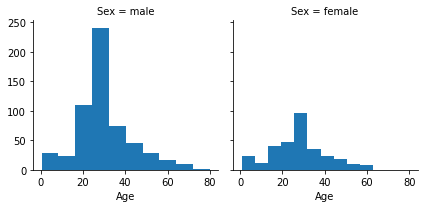

In [28]:
g = sns.FacetGrid(data, col="Sex")
g.map(plt.hist,"Age")



In [13]:
cleanup = {"Sex":{"male":1, "female": 0}}

data.replace(cleanup, inplace=True)
data["Sex"]

0      1
1      1
2      1
3      0
4      1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Sex, Length: 891, dtype: int64

In [30]:
def plot_correlation_map(df):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 
        
        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )


'\nThe function takes in a dataframe as a parameter and then it calulates and returns the pairwise linear correleation between each input of the coloums then s and ax are plotted on to the same axes with subplot function after this a color pallette is generated then a heatmap (the graph) is plotted to show using our 2d data set and the colors being cmap and making the squares perfectly alligend as it is set to "True" the axes are detonnated by the ax variable\n\n'

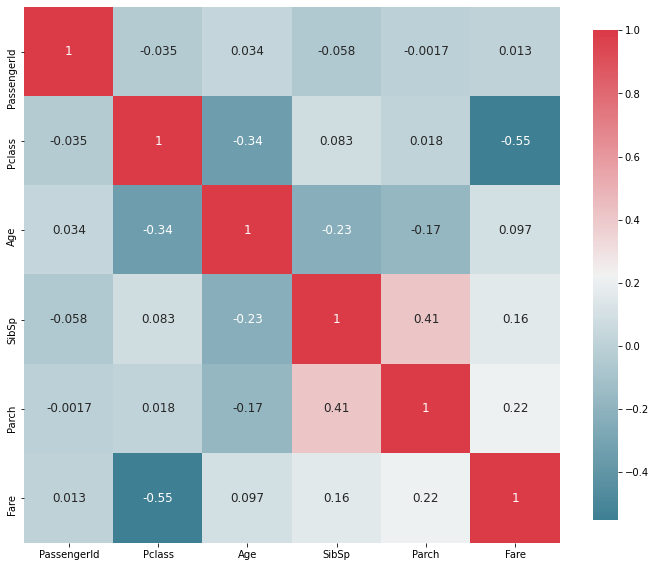

In [31]:

plot_correlation_map(data)
"""
The function takes in a dataframe as a parameter and then it calulates and returns the pairwise linear correleation between each input of the coloums then s and ax are plotted on to the same axes with subplot function after this a color pallette is generated then a heatmap (the graph) is plotted to show using our 2d data set and the colors being cmap and making the squares perfectly alligend as it is set to "True" the axes are detonnated by the ax variable

"""

In [32]:
data[["Pclass", "Survived"]].groupby("Survived").mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


In [33]:
data.drop('Name', axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,male,28.0,0,0,248740,13.0000,28,S
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,male,20.0,0,0,350050,7.8542,28,S
3,568,No,3,female,29.0,0,4,349909,21.0750,28,S
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,28,C
887,61,No,3,male,22.0,0,0,2669,7.2292,28,C
888,535,No,3,female,30.0,0,0,315084,8.6625,28,S
889,102,No,3,male,28.0,0,0,349215,7.8958,28,S


In [42]:
td = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":       "Officer",

                    "Rev":        'Officer',

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  'the Countess': "Royalty",

                    "Dona":       'Royalty',

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [44]:
data['Title'] = data['Name'].map(td).fillna('Nan')

In [47]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,28,S,Nan
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Nan
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,28,S,Nan
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,28,S,Nan
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,28,C,Nan
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,28,C,Nan
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,28,S,Nan
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,28,S,Nan


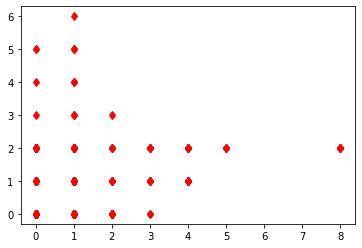

In [49]:
plt.plot(data['SibSp'],data['Parch'], "rd")